# <center> APE </center> #

In [1]:
# Some parameters
VAR = 'Psi'  # Pick what plot
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Year = 'PSI.nc'
Qplot = 'Y'

In [1]:
# Load in Modules
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.ma as ma
import sys
from matplotlib import gridspec
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from HB_Plot import nf, fmt
import SG
import useful as hb
import layers_calc_numba
import APE_Calc as AC
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

tau = ['50', '250', '500', '1000', '2000']
#tau = ['50', '250', '500' , '1000', '2000']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Vary_N/'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'m/VSQ.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)


ImportError: No module named numba

In [4]:
fname = x+'/2000m/'
c = utils.ChannelSetup(output_dir=str(fname))

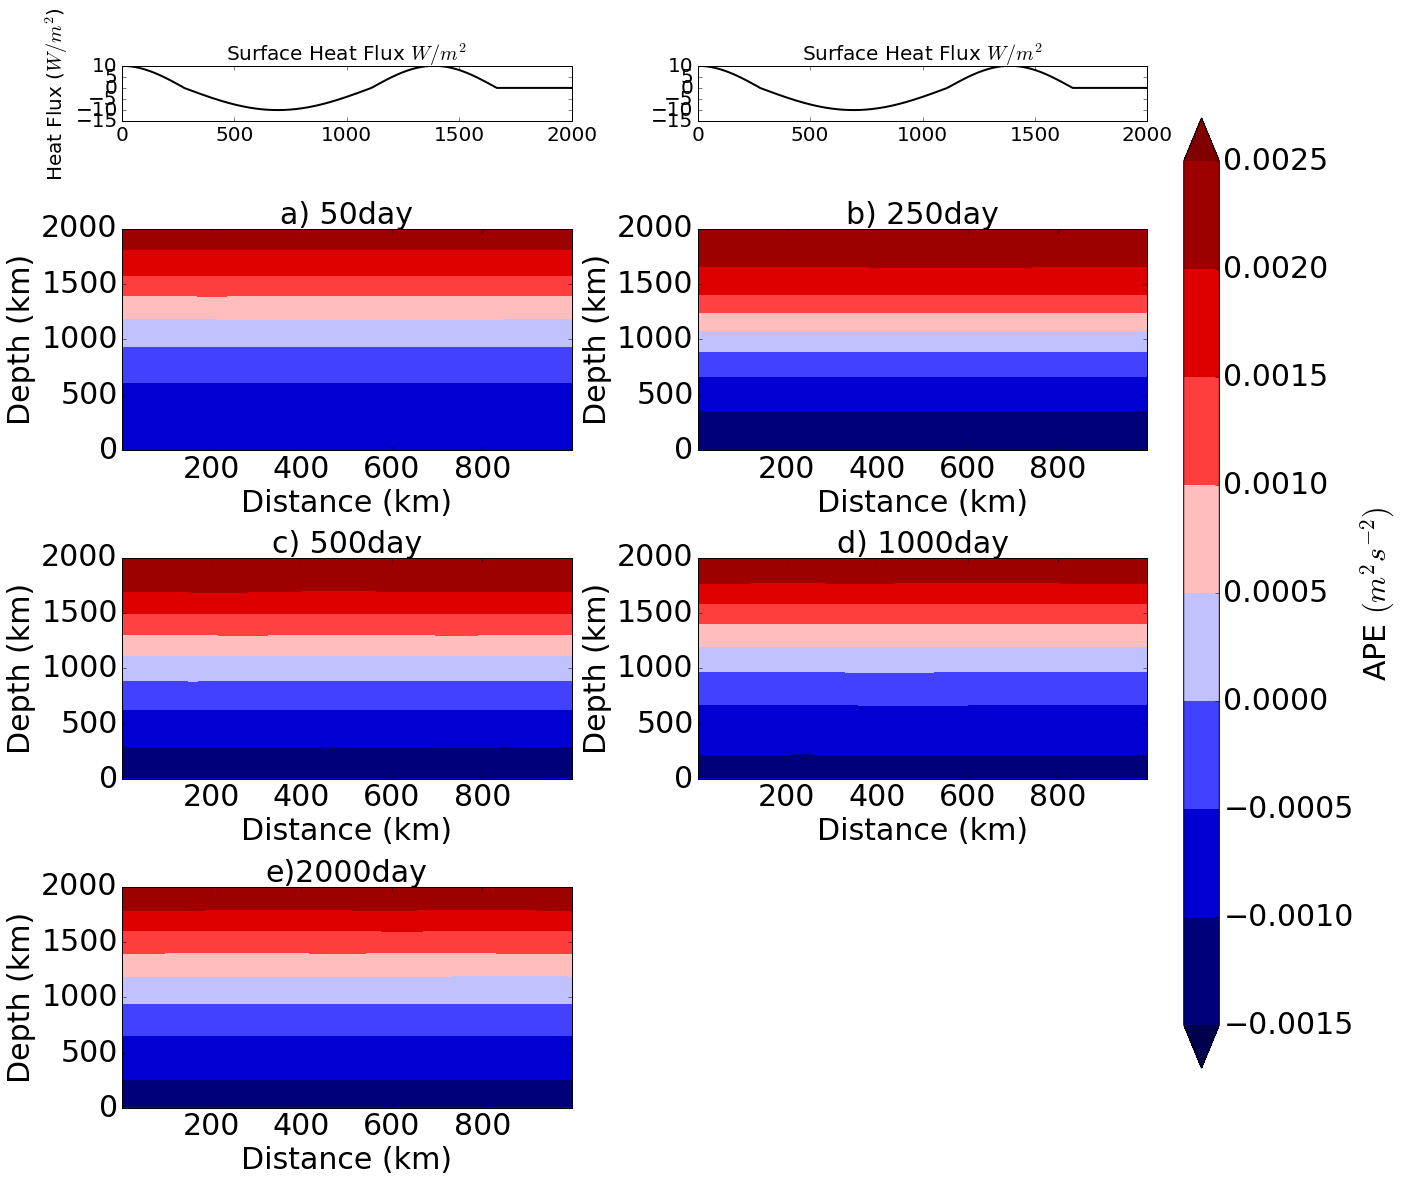

In [5]:
fig = plt.figure(figsize=(16.5, 16.5))
APEt = []
EKEt = []
# Create Panels
Psi_levs = np.arange(-3, 3., .1)
Psi_ticks =np.arange(-0.5, 4.15, .03)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
gs = gridspec.GridSpec(4, 3, height_ratios=[1, 4, 4, 4])
ax = plt.subplot(gs[3])
ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax = plt.subplot(gs[1])
if Full == 'N':
    gs = gridspec.GridSpec(4, 2, height_ratios=[1, 4, 4, 4])
    ax = plt.subplot(gs[0])
    ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax = plt.subplot(gs[1])
    ax.plot(c.yc/1000,-Q,  color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    g = AC.APEcomputer(c)
    APE = g.calc_APE()
    APEt.append(np.sum(APE))
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    EKEt.append(np.mean(c.calc_EKE()*CellVol))
    ax = plt.subplot(gs[2+i])
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xc/1000, c.yc/1000,
                (APE/(1000*5000*5000*c.H)),cmap=plt.cm.seismic, extend='both')
    
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('APE $(m^2s^{-2})$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

(0, 2100)

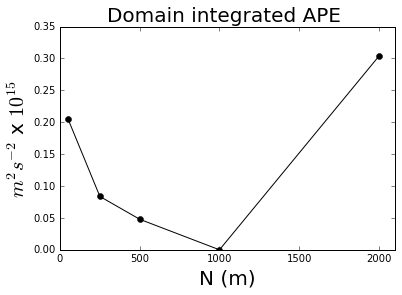

In [7]:
plt.plot([50,250,500,1000,2000],np.array(APEt-APEt[3])*10**-15,'-ko')
plt.xlabel('N (m)', fontsize=20)
plt.ylabel(r'$m^2s^{-2}$ x $10^{15}$', fontsize=20)
plt.title('Domain integrated APE ', fontsize=20)
#plt.ylim(0.22,0.3)
plt.xlim(0,2100)

In [57]:
APEt = []
EKEt = []
tau = ['50', '250', '500', '1000', '2000']
for i in range(len(tau)):
    fname = x+'/'+str(tau[i])+'m/'
    
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    g = AC.APEcomputer(c)
    APE = g.calc_APE()
    APEt.append(np.mean(APE/(1000*5000*5000*c.H)))
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    EKEt.append(np.mean(c.calc_EKE()*CellVol))

(0, 2100)

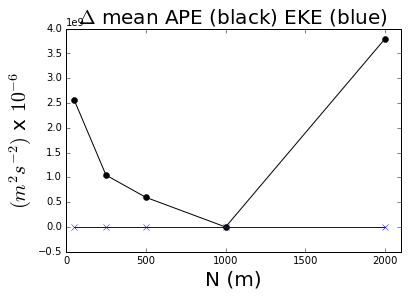

In [58]:
APE_ref = APEt[3]
EKE_ref = EKEt[3]
plt.plot([50,250,500,1000,2000],((APEt-APE_ref))/(c.Ly,'-ko')
plt.plot([50,250,500,1000,2000],(EKEt-EKE_ref),'-bx')
plt.xlabel('N (m)', fontsize=20)
plt.ylabel(r'$(m^2 s^{-2})$ x $10^{-6}$', fontsize=20)
plt.title('$\Delta$ mean APE (black) EKE (blue) ', fontsize=20)
#plt.ylim(0,1)
plt.xlim(0,2100)

(0, 2100)

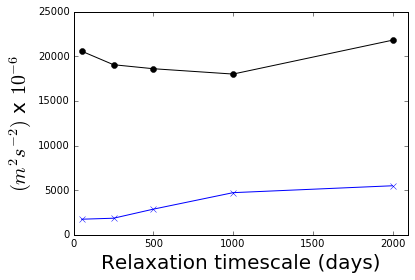

In [53]:
plt.plot([50,250,500,1000,2000],(np.array(APEt)*10**-6),'-ko')
plt.plot([50,250,500,1000,2000],(np.array(EKEt)*10**-4),'-bx')

plt.xlabel('Relaxation timescale (days)', fontsize=20)
plt.ylabel(r'$(m^2 s^{-2})$ x $10^{-6}$', fontsize=20)
#plt.title('mean APE (black) and mean EKE(blue)', fontsize=20)
#plt.ylim(0,1)
plt.xlim(0,2100)

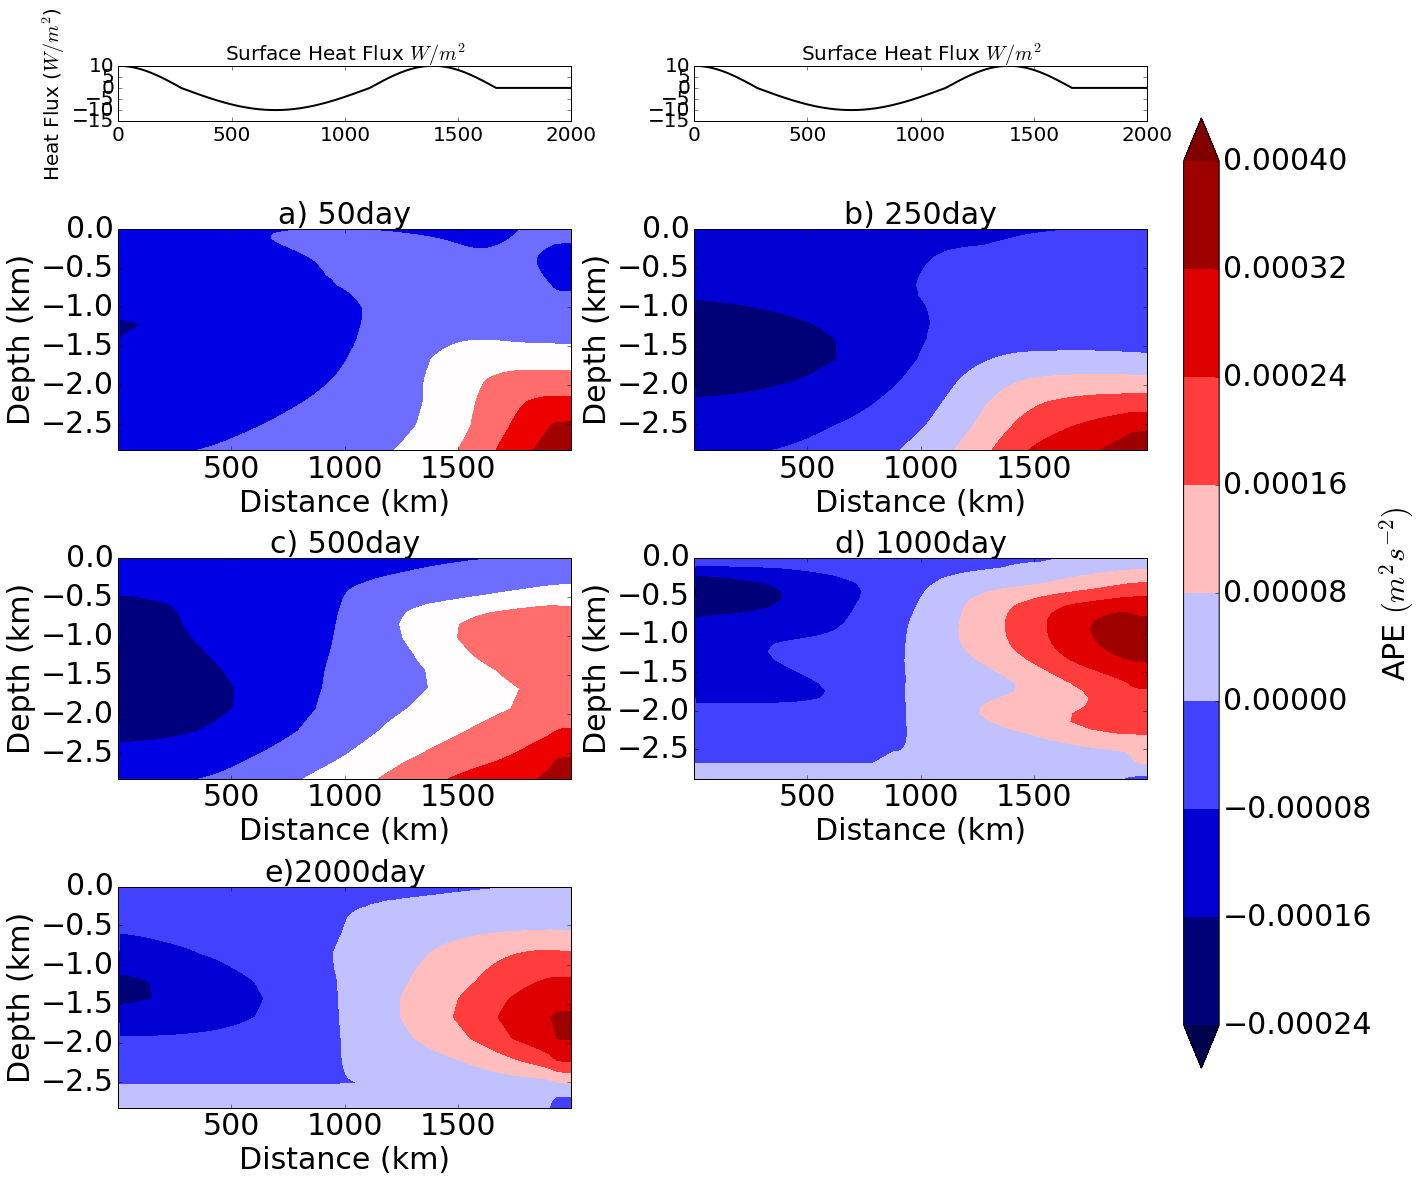

In [6]:
fig = plt.figure(figsize=(16.5, 16.5))
APEt = []
EKEt = []
# Create Panels
Psi_levs = np.arange(-3, 3., .1)
Psi_ticks =np.arange(-0.5, 4.15, .03)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
gs = gridspec.GridSpec(4, 3, height_ratios=[1, 4, 4, 4])
ax = plt.subplot(gs[3])
ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax = plt.subplot(gs[1])
if Full == 'N':
    gs = gridspec.GridSpec(4, 2, height_ratios=[1, 4, 4, 4])
    ax = plt.subplot(gs[0])
    ax.plot(c.yc/1000,-Q, color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.set_ylabel('Heat Flux ($W/m^2$)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax = plt.subplot(gs[1])
    ax.plot(c.yc/1000,-Q,  color='k', linewidth=2)
    ax.set_title('Surface Heat Flux $W/m^2$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'m/'
    
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    g = AC.APEcomputer(c)
    APE = g.calc_APE_3d().mean(axis=2)
    APEt.append(np.sum(APE)/(c.Lx*c.Ly))
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    EKEt.append(np.mean(c.calc_EKE()*CellVol))
    ax = plt.subplot(gs[2+i])
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                (APE/(1000*c.H*5000*5000)),cmap=plt.cm.seismic, extend='both')
    
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('APE $(m^2s^{-2})$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)